In [66]:
# Reference: Jennings et. al.,The Journal of Molecular Diagnostics, Vol. 19, No. 3, May 2017
# Determining depth of sequencesGiven an allele burden of 5%
# and 250 read depth, the binomial distribution of true positives (TPs) can be
# calculated. Also, given a sequence error rate of 1%, the binomial
# distribution of false-positive (FP) results can also be calculated and shown
# to overlap the true positive distribution. The overlap of true-positive
# and false-positive distributions should be considered when determining
# minimum depth of sequence needed to reliably detect a given allele burden.

import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

min_num_reads = 4
seq_coverage = 250

number_alt_reads = range(1,25,1)
print(number_alt_reads)

alpha_tf_threshold = 0.05

#VAF%
min_vaf = np.arange(0.01, 0.25,0.01)
print(min_vaf)

# Sequencing error rate of 1% False Positive
alpha_fp_threshold = 0.01

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom
df = pd.DataFrame({'N_Reads': number_alt_reads,
                   'Proportion': min_vaf,
                    'dist_TP' : stats.binom.pmf(number_alt_reads,
                                     seq_coverage,
                                     alpha_tf_threshold #Probability
                                     ),
                   'cdf_TP': stats.binom.cdf(number_alt_reads,
                                      seq_coverage,
                                       alpha_tf_threshold #Probability
                                      ), 
                   'dist_FP':stats.binom.pmf(number_alt_reads,
                                     seq_coverage,
                                     alpha_fp_threshold #Probability
                                     ),
                   'cdf_FP':stats.binom.cdf(number_alt_reads,
                                      seq_coverage,
                                       alpha_fp_threshold #Probability
                                      )

    })

detection_fraction = 1 - stats.binom.cdf(min_num_reads,
                            seq_coverage,
                            alpha_tf_threshold
                            )
print(detection_fraction)
detection_rate = round(100*detection_fraction,3)
print(detection_rate)

plt_title = ["Depth of Sequencing ",
             seq_coverage,"x\n",
             "TP variant Detection rate with > ",
             min_num_reads," reads = ",
            detection_rate,"% "
            ]
plt_title = ''.join(str(e) for e in plt_title)
print(plt_title)


range(1, 25)
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24]
0.9954292635309988
99.543
Depth of Sequencing 250x
TP variant Detection rate with > 4 reads = 99.543% 


    N_Reads  Proportion   dist_TP    cdf_TP       dist_FP    cdf_FP
0         1        0.01  0.000035  0.000038  2.046932e-01  0.285752
1         2        0.02  0.000233  0.000271  2.574172e-01  0.543169
2         3        0.03  0.001012  0.001282  2.149477e-01  0.758117
3         4        0.04  0.003288  0.004571  1.340709e-01  0.892188
4         5        0.05  0.008515  0.013086  6.662919e-02  0.958817
5         6        0.06  0.018299  0.031385  2.748174e-02  0.986299
6         7        0.07  0.033572  0.064957  9.676109e-03  0.995975
7         8        0.08  0.053671  0.118627  2.968806e-03  0.998943
8         9        0.09  0.075955  0.194582  8.063424e-04  0.999750
9        10        0.10  0.096343  0.290925  1.962914e-04  0.999946
10       11        0.11  0.110633  0.401558  4.325982e-05  0.999989
11       12        0.12  0.115971  0.517529  8.702944e-06  0.999998
12       13        0.13  0.111745  0.629274  1.609402e-06  1.000000
13       14        0.14  0.099562  0.728836  2.7

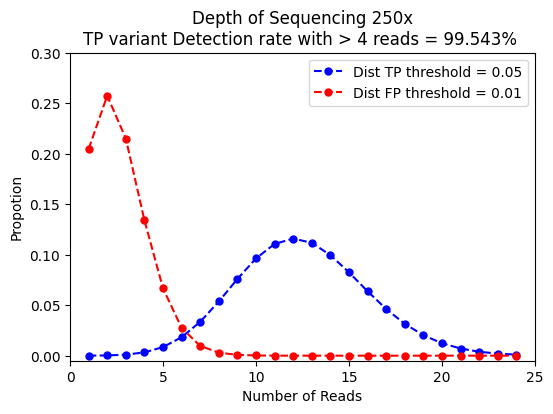

In [67]:
# detection_rate = paste0(round(100 * detection_fraction,3)," %")

print(df)
print(df['N_Reads'])
# fig, ax = plt.subplots(1, 1)
# fig.tight_layout(pad=5.0)
plt.figure(figsize=(6, 4))

plt.plot(df['N_Reads'],df['dist_TP'],marker='o',markersize=5,linestyle='--',color='b')
plt.plot(df['N_Reads'],df['dist_FP'],marker='o',markersize=5,linestyle='--',color='r')
plt.ylabel('Propotion')
plt.ylim([-0.005, 0.30])
plt.xlabel('Number of Reads')
plt.xlim([0,25])
plt.legend(["Dist TP threshold = 0.05", "Dist FP threshold = 0.01"], loc ="upper right")
plt.title(plt_title)
plt.show()
